In [36]:
from ZarcfitCalculations import *
import numpy as np

In [37]:
from SimPEG import Tests

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt

In [39]:
path = "../data/HVC2014_10Grenon/"
# fnameobs = "BC13867-A 2014-10-23.z"
fnameobs = "BC13871-B 2014-10-23.z"
# fnameobs = "BC13890A 2014-10-23.z"
# fnameobs = "BC13859 2014-10-23.z"
pathobs = path+fnameobs
temp = np.loadtxt(pathobs, skiprows=11, delimiter=",")
obs = temp[:,4]+1j*temp[:,5]
frequency = temp[:,0].copy()

In [40]:
zarc = ZarcfitCalculations(obs, frequency)

In [41]:
m0 = zarc.GetDefaultmodel()

In [42]:
pred0 = zarc.Zparallel(frequency)

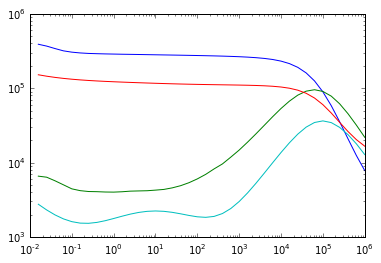

In [43]:
plt.loglog(frequency, obs.real)
plt.loglog(frequency, -obs.imag)
plt.loglog(frequency, pred0.real)
plt.loglog(frequency, -pred0.imag)

In [44]:
# a = np.r_[obs.real, obs.imag]
# b = np.r_[pred.real, pred.imag]
# u = abs(a)*0.05

In [45]:
# np.linalg.norm((b-a)/u)**2

In [46]:
inact = np.isnan(m0)
m0[~inact]

array([ -9.21034037,   9.21034037,  11.51292546,  11.51292546,
         0.8       ,   9.21034037,   2.30258509,   0.5       ,
         0.1       ,   6.90775528,   0.5       ,  23.02585093,
        -9.21034037,   0.5       ,   0.05      ])

In [47]:
uncert = (np.r_[0.085*abs(obs.real)+np.linalg.norm(obs.real)*5e-5, 0.085*abs(obs.imag)+np.linalg.norm(obs.imag)*1e-6])
m1 = zarc.GN(m0, uncert, maxiter=100)

misfit: 1990.78357336 1910.00882438
0 1910.00882438
misfit: 1910.00882438 1622.09825727
1 1622.09825727
misfit: 1622.09825727 1566.88052831
2 1566.88052831
misfit: 1566.88052831 1562.15783511
3 1562.15783511
misfit: 1562.15783511 1556.43853477
4 1556.43853477
misfit: 1556.43853477 1551.32915684
5 1551.32915684
misfit: 1551.32915684 1547.74342798
6 1547.74342798
misfit: 1547.74342798 1546.16163797
7 1546.16163797
misfit: 1546.16163797 1544.06519983
8 1544.06519983
misfit: 1544.06519983 1542.4306909
9 1542.4306909
misfit: 1542.4306909 1541.0795647
10 1541.0795647
misfit: 1541.0795647 1539.37370596
11 1539.37370596
misfit: 1539.37370596 1536.51759641
12 1536.51759641
misfit: 1536.51759641 1467.15566935
13 1467.15566935
misfit: 1467.15566935 1225.42493526
14 1225.42493526
misfit: 1225.42493526 1184.36405201
15 1184.36405201
misfit: 1184.36405201 1172.48840518
16 1172.48840518
misfit: 1172.48840518 1154.44655955
17 1154.44655955
misfit: 1154.44655955 1096.75276625
18 1096.75276625
misfit: 1

In [48]:
m0

array([ -9.21034037,   9.21034037,  11.51292546,  11.51292546,
         0.8       ,   9.21034037,   2.30258509,   0.5       ,
         0.1       ,   6.90775528,   0.5       ,  23.02585093,
        -9.21034037,   0.5       ,   0.05      ])

In [49]:
m1

array([ -1.76607003e+01,  -1.13514382e+01,   1.24812432e+01,
         1.08458000e+01,   7.95940646e-01,   1.07236803e+01,
        -1.07095152e+00,   2.72174013e-01,   2.80832636e+00,
         8.30028775e+00,   9.77276307e+00,   2.35541844e+01,
        -7.64848091e+00,   1.89355359e+00,   8.08294866e-03])

In [50]:
print zarc.Rh, zarc.Rm, zarc.Rl

263351.048008 16.5821424634 45418.7493236


In [51]:
print zarc.Fh, zarc.Fm, zarc.Fl

51318.1595287 4025.03042777 0.342682294791


In [52]:
print zarc.Ph, zarc.Pm, zarc.Pl

0.79594064626 9.77276307264 0.27217401323


In [53]:
pred = zarc.dpred(m1)

In [54]:
frequency.shape

(40,)

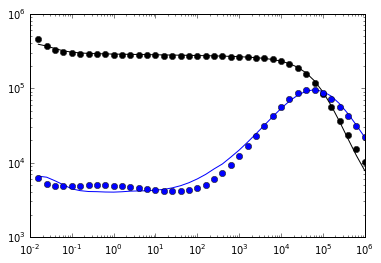

In [55]:
plt.loglog(frequency, obs.real, 'k')
plt.loglog(frequency, -obs.imag, 'b')
plt.loglog(frequency, pred[:40], 'ko')
plt.loglog(frequency, -pred[40:], 'bo')

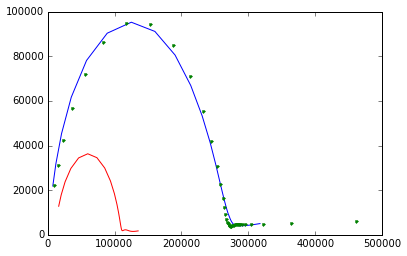

In [21]:
plt.plot(obs.real[:-3], -obs.imag[:-3])
plt.plot( pred[:40], -pred[40:], '.')
plt.plot(pred0.real[:-3], -pred0.imag[:-3])

In [20]:
print zarc.Fh, zarc.Fm, zarc.Fl

3854859.13818 0.1 381489083714.0


In [153]:
# dm = m0*0.1
# derChk = lambda m: [zarc.dpred(m), lambda mx: zarc.Jvec(m0, mx)]
# passed = Tests.checkDerivative(derChk, m0, plotIt=False, dx = m0*2, num=4)

In [ ]:
model = np.ones(10)
model[3] = np.nan

In [ ]:
for mod in model:
    if ~np.isnan(mod):
        print "inactive model"
    else:
        print mod

In [ ]:
np.linalg.solve??